In [77]:
#importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [58]:
#lendo arquivo csv
df = pd.read_csv('dados_produtos.csv', sep=',')

In [4]:
#vendo informações sobre as colunas do arquivo csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [9]:
#mostrando os valores das colunas
df.describe

<bound method NDFrame.describe of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

Text(0.5, 0, 'produto')

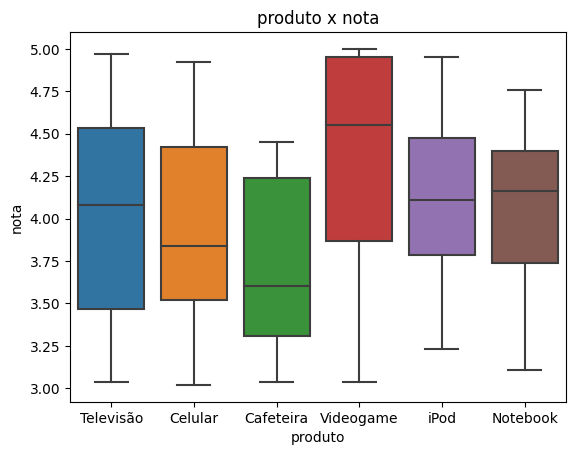

In [13]:
#fazendo boxplot
sns.boxplot(x=df['product_name'], y=df['rating'])
plt.title('produto x nota')
plt.ylabel('nota')
plt.xlabel('produto')

In [45]:
#mostrando se em alguma linha tem um valor nulo
df.isnull()

,produto,nota,quantdade_notas,comprou
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [20]:
#fazendo dicionario para renomear as colunas do arquivo
dic = {'product_name':'produto','rating':'nota','rating_count':'quantdade_notas','purchased':'comprou'}

In [61]:
#renomeando as colunas do arquivo
df.rename(columns=dic, inplace=True)

In [62]:
#mostrando as primeiras 10 linhas do arquivo depois de renomear
df.head(10)

,produto,nota,quantdade_notas,comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
5,Celular,3.98,1413,0
6,iPod,3.50,1907,0
7,Notebook,4.76,3857,0
8,Videogame,3.94,2800,1
9,Televisão,4.68,2600,0


In [63]:
#mostrando numero de produtos comprados e não comprados
n_total = df['comprou'].count()
n_compras = df['comprou'].sum()
n_nao_compras = n_total - n_compras
print(f'numero de dados :{n_total}')
print(f'numero de produtos comprados :{n_compras}')
print(f'numero de produtos não comprados :{n_nao_compras}')

numero de dados :100
numero de produtos comprados :55
numero de produtos não comprados :45


In [65]:
#trocando os numeros por palavras
comprou = {0:'não comprou',1:'comprou'}
df = df .replace({'comprou':comprou})
df.head()

,produto,nota,quantdade_notas,comprou
0,Televisão,3.04,29,comprou
1,Celular,3.46,3872,não comprou
2,Cafeteira,3.25,1187,não comprou
3,Televisão,3.77,4097,comprou
4,Videogame,5.00,4738,comprou


In [66]:
#transformando variavel para array
nota = df['nota']
compra = df['comprou']
notas = nota.array
compras = compra.array
print(notas)
print(compras)

<PandasArray>
[3.04, 3.46, 3.25, 3.77,  5.0, 3.98,  3.5, 4.76, 3.94, 4.68, 4.43, 3.14, 4.42,
 3.14, 3.62,  4.1, 3.93, 4.61, 4.18, 3.11, 4.24, 4.95, 4.49,  3.6, 4.92, 3.12,
 4.89, 3.76, 3.76, 4.94, 3.02, 4.12, 3.23, 4.45, 4.08,  4.0, 3.31, 3.04,  4.8,
 4.31, 3.82, 3.45, 3.05, 3.69, 3.45, 4.98, 4.96, 3.75,  5.0, 3.39, 3.33, 4.95,
  4.8, 4.24, 4.97, 4.23, 4.68, 3.51, 3.16, 4.99, 4.24, 3.49, 4.11, 4.68, 4.39,
 3.71, 4.55, 3.52, 4.47, 4.23, 4.01, 4.67, 3.79, 3.04, 3.44, 3.78, 3.87, 3.69,
  4.6, 4.42, 3.38, 4.33, 3.81, 4.36, 4.29, 4.14, 4.12,  3.7, 4.81, 3.84, 3.99,
 4.64, 4.35, 4.15, 4.78, 4.44, 4.66, 4.33,  3.3, 4.08]
Length: 100, dtype: float64
<PandasArray>
[    'comprou', 'não comprou', 'não comprou',     'comprou',     'comprou',
 'não comprou', 'não comprou', 'não comprou',     'comprou', 'não comprou',
 'não comprou',     'comprou',     'comprou', 'não comprou',     'comprou',
     'comprou',     'comprou',     'comprou',     'comprou', 'não comprou',
 'não comprou', 'não comprou',  

In [67]:
#dividindo em treino e teste
notas_treino, notas_teste, compras_treino, compras_teste = train_test_split(notas.reshape(-1,1),compras.reshape(-1,1),test_size=0.2,random_state=42)

In [68]:
#criando o modelo
modelo = DecisionTreeClassifier()
modelo.fit(notas_treino,compras_treino)

DecisionTreeClassifier()

In [70]:
y_pred=modelo.predict(notas_teste)
y_pred

array(['não comprou', 'não comprou', 'não comprou', 'comprou', 'comprou',
       'comprou', 'comprou', 'comprou', 'não comprou', 'não comprou',
       'não comprou', 'não comprou', 'não comprou', 'não comprou',
       'não comprou', 'comprou', 'não comprou', 'comprou', 'não comprou',
       'não comprou'], dtype=object)

In [72]:
acuracia = accuracy_score(y_pred, compras_teste)
acuracia

0.6

In [78]:
matrix = confusion_matrix(y_pred, compras_teste)
matrix

array([[7, 0],
       [8, 5]], dtype=int64)

[Text(0.8536585365853658, 0.98, '3.04 <= 4.98\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = comprou'),
 Text(0.8211382113821138, 0.94, '3.04 <= 4.93\ngini = 0.5\nsamples = 78\nvalue = [38, 40]\nclass = não comprou'),
 Text(0.7398373983739838, 0.9, '3.04 <= 4.77\ngini = 0.5\nsamples = 73\nvalue = [37, 36]\nclass = comprou'),
 Text(0.6747967479674797, 0.86, '3.04 <= 4.665\ngini = 0.499\nsamples = 67\nvalue = [32, 35]\nclass = não comprou'),
 Text(0.6422764227642277, 0.82, '3.04 <= 4.455\ngini = 0.499\nsamples = 62\nvalue = [32, 30]\nclass = comprou'),
 Text(0.6097560975609756, 0.78, '3.04 <= 3.96\ngini = 0.497\nsamples = 56\nvalue = [26, 30]\nclass = não comprou'),
 Text(0.43902439024390244, 0.74, '3.04 <= 3.765\ngini = 0.494\nsamples = 36\nvalue = [20, 16]\nclass = comprou'),
 Text(0.35772357723577236, 0.7, '3.04 <= 3.695\ngini = 0.497\nsamples = 28\nvalue = [13, 15]\nclass = não comprou'),
 Text(0.2926829268292683, 0.66, '3.04 <= 3.515\ngini = 0.499\nsamples = 23\nvalue = [12, 1

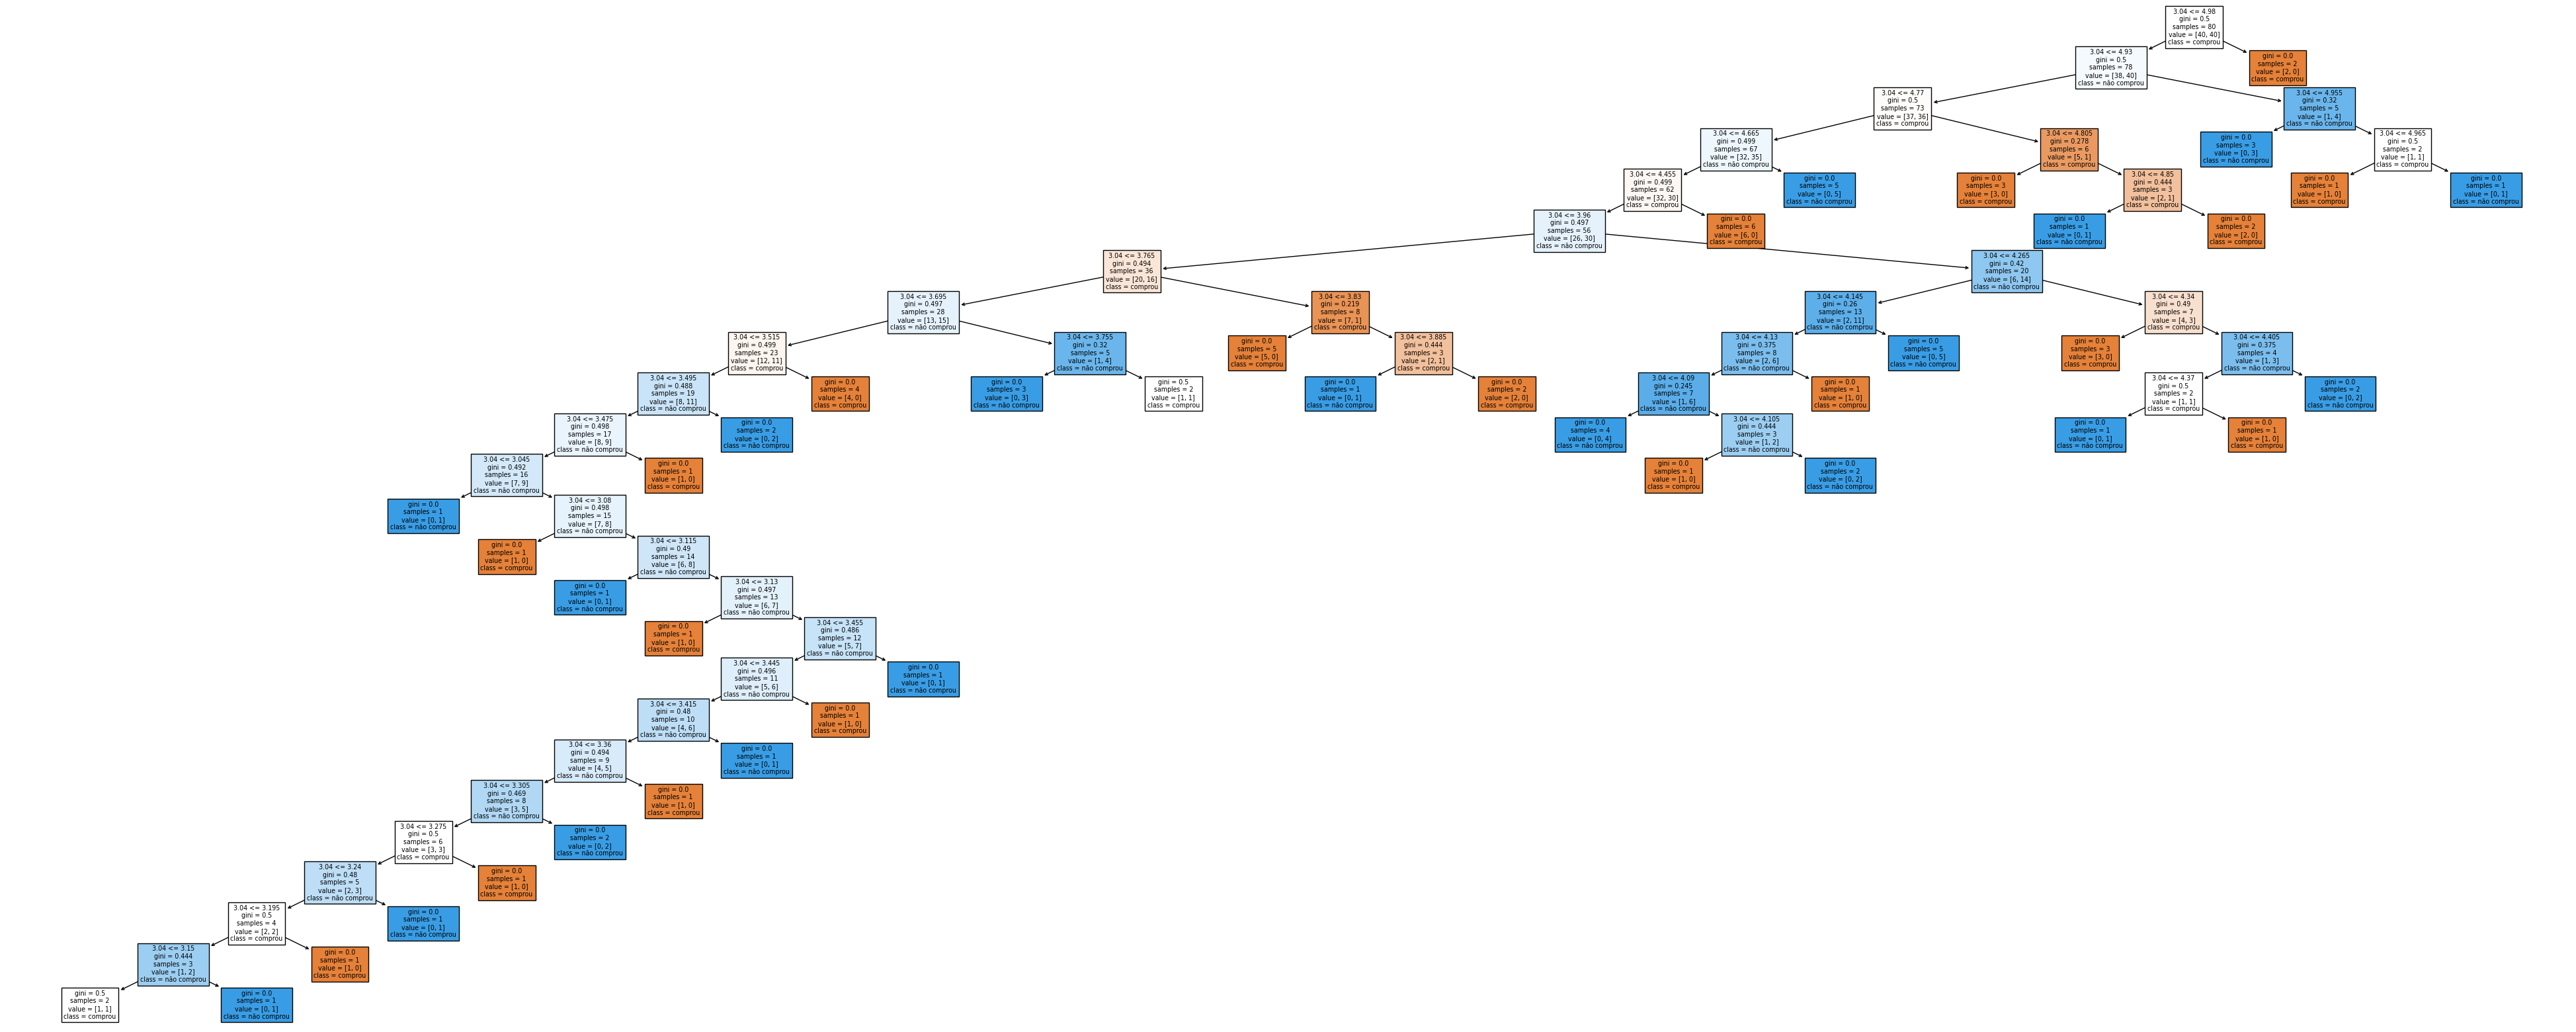

In [80]:
#mostrando a arvore de decisão
fig = plt.figure(figsize=(50,20))
tree.plot_tree(modelo,feature_names=notas.tolist(), class_names=compras.tolist(), filled=True)